In [82]:
#Define Libraries to Import
import numpy as np
import pandas as pd

import pip
#!pip install twitter
from pandas.io.json import json_normalize
from twitter import Twitter
from twitter import OAuth

In [83]:
#API KEY VARIABLES

apikey='LsMp4fN8jPuzkz2gjYsXRw4eT'
apisecretkey='cwubraGXcVS8yBoR87mx6OQkaceKYm3rfCpiMqUHS1gz2KARFf'
accesstoken='1231641925230440454-iYdJvcs2Btswj1rT7TA29XYvG3WiyM'
accesstokensecret='4EhQeKBmWXFQGwojC7mMHJxJB6nxg8sKCbkyVwlHONPKO'


In [84]:
#Connect to Twitter
oauth = OAuth(accesstoken,accesstokensecret,apikey,apisecretkey)
api = Twitter(auth=oauth)

help(api)

Help on Twitter in module twitter.api object:

class Twitter(TwitterCall)
 |  Twitter(format='json', domain='api.twitter.com', secure=True, auth=None, api_version=<class 'twitter.api._DEFAULT'>, retry=False)
 |  
 |  The minimalist yet fully featured Twitter API class.
 |  
 |  Get RESTful data by accessing members of this class. The result
 |  is decoded python objects (lists and dicts).
 |  
 |  The Twitter API is documented at:
 |  
 |    https://dev.twitter.com/overview/documentation
 |  
 |  The list of most accessible functions is listed at:
 |  
 |    https://dev.twitter.com/rest/public
 |  
 |  
 |  Examples::
 |  
 |      from twitter import *
 |  
 |      t = Twitter(
 |          auth=OAuth(token, token_secret, consumer_key, consumer_secret))
 |  
 |      # Get your "home" timeline
 |      t.statuses.home_timeline()
 |  
 |      # Get a particular friend's timeline
 |      t.statuses.user_timeline(screen_name="billybob")
 |  
 |      # to pass in GET/POST parameters, such as 

In [85]:
#Search tweets with the word - "Trump"
search_result=api.search.tweets(q='Trump',count=100,tweet_mode='extended')
dfsr=json_normalize(search_result)
dfst=json_normalize(dfsr.statuses.values[0])
print(dfst)
#with only the Value
df0=pd.DataFrame({'Value':dfst.loc[0]})
print(df0)


                        created_at                   id               id_str  \
0   Sat Jan 02 15:34:57 +0000 2021  1345393149582188544  1345393149582188544   
1   Sat Jan 02 15:34:57 +0000 2021  1345393149267603457  1345393149267603457   
2   Sat Jan 02 15:34:57 +0000 2021  1345393149049511938  1345393149049511938   
3   Sat Jan 02 15:34:57 +0000 2021  1345393148369879043  1345393148369879043   
4   Sat Jan 02 15:34:57 +0000 2021  1345393148340670465  1345393148340670465   
..                             ...                  ...                  ...   
82  Sat Jan 02 15:34:54 +0000 2021  1345393134524575745  1345393134524575745   
83  Sat Jan 02 15:34:53 +0000 2021  1345393133832589316  1345393133832589316   
84  Sat Jan 02 15:34:53 +0000 2021  1345393132863680512  1345393132863680512   
85  Sat Jan 02 15:34:53 +0000 2021  1345393132821741570  1345393132821741570   
86  Sat Jan 02 15:34:53 +0000 2021  1345393132540669954  1345393132540669954   

                                       

In [86]:
###Followers of a Twitter Account
tfollow=api.followers.ids(screen_name=" realDonaldTrump " )
df_fol=json_normalize(tfollow)

#OR directly normalize the nested JSON object that has the information we want
tfollow=api.followers.ids(screen_name=" realDonaldTrump " )
df_fol1=json_normalize(tfollow,'ids')

dfst2=json_normalize(search_result,'statuses')

u0=api.users.lookup(user_id=df_fol1.loc[0,0])
dfu0=json_normalize(u0)

#get Previous Tweets
#The first time we run the function without the max id parameter, after that we use it. 
#We also make use of the pandas concat() function.

df = pd.DataFrame()
mid=0
for i in range(34):
    if i==0:
        tjson=api.statuses.user_timeline(screen_name="realDonaldTrump", tweet_mode='extended',count = 120)
    else :
        tjson=api.statuses.user_timeline(screen_name="realDonaldTrump", tweet_mode='extended',count = 120, max_id=mid)
 
    if len(tjson)>0:
        dftrump=json_normalize(tjson)
        mid=dftrump['id'].min()
        mid=mid-1
        df = pd.concat([df,dftrump],ignore_index=True)
        
#We append dftrump to df every loop, dftrump takes on 200 rows at a time.

C:\Users\krish\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [87]:
df.columns
df.full_text

0                               MAKE AMERICA GREAT AGAIN!
1       Will be in Georgia on Monday night, 9:00 P.M. ...
2       TRANSPARENCY in medical pricing will be one of...
3       For historical purposes remember, I was able t...
4                                 https://t.co/t6nWHJjJAN
                              ...                        
3210    RT @WhiteHouse: President @realDonaldTrump and...
3211    RT @SenHawleyPress: "Voters have elected a Rep...
3212    RT @GrassleyPress: The historical precedent is...
3213    RT @GrassleyPress: In 2018, having witnessed @...
3214    RT @SenateGOP: 1 → Gorsuch.\n\n2 → Kavanaugh.\...
Name: full_text, Length: 3215, dtype: object

In [88]:
############ TEXT BLOB #############

import pip

#! pip install textblob
#!python -m textblob.download_corpora

from textblob import TextBlob

In [89]:
#Primary functions in textblob

tx = df.loc[1,'full_text']
#convert to TextBlob
blob = TextBlob(tx)
print("\n######################\nThe tweet we are looking at right now: \n")
print(blob)

#find the tags
print("\n######################\nThe tags available in this tweet: \n")
print(blob.tags)

#find all the sentences in the tweet
print("\n######################\nThe sentences in the tweet : \n")
print(blob.sentences)
#find the first words in the first sentence - wordlist
print("\n######################\nThe wordlist of the first sentence :\n")
print(blob.sentences[0].words)

print("\n######################\nLooking at all the nouns: \n")
print(blob.noun_phrases)

print("\n######################\nReturns a list of tuples of 3 successive words : \n")
print(blob.ngrams(3))
print("\n######################\nReturns a list of tuples of 3 successive words : \n")
print(blob.ngrams(3))
print("\n######################\nJust the first tuple of 3 words: \n")
print(blob.ngrams(3)[0])

print("\n######################\nGet the corrected words if any sentence have spelling mistakes : \n")
print(blob.correct())

print("\n######################\nReturn the word with correctness accuracy : \n")
print(blob.words[1].spellcheck())
print("\n")
print(blob.words[2].spellcheck())

print("\n######################\nThe langugage of this tweet is:")
print(blob.detect_language())

#to traslate the tweet to Arabic language
#blob.translate(to= 'ar')
#to traslate the tweet to French language
#blob.translate(to= 'fr')


######################
The tweet we are looking at right now: 

Will be in Georgia on Monday night, 9:00 P.M. to RALLY for two GREAT people, @sendavidperdue &amp; @KLoeffler. GET READY TO VOTE ON TUESDAY!!!

######################
The tags available in this tweet: 

[('Will', 'MD'), ('be', 'VB'), ('in', 'IN'), ('Georgia', 'NNP'), ('on', 'IN'), ('Monday', 'NNP'), ('night', 'NN'), ('9:00', 'CD'), ('P.M.', 'NNP'), ('to', 'TO'), ('RALLY', 'NNP'), ('for', 'IN'), ('two', 'CD'), ('GREAT', 'JJ'), ('people', 'NNS'), ('@', 'NNP'), ('sendavidperdue', 'NNP'), ('&', 'CC'), ('amp', 'NN'), ('@', 'CC'), ('KLoeffler', 'NNP'), ('GET', 'NNP'), ('READY', 'NNP'), ('TO', 'NNP'), ('VOTE', 'NNP'), ('ON', 'NNP'), ('TUESDAY', 'NNP')]

######################
The sentences in the tweet : 

[Sentence("Will be in Georgia on Monday night, 9:00 P.M. to RALLY for two GREAT people, @sendavidperdue &amp; @KLoeffler."), Sentence("GET READY TO VOTE ON TUESDAY!!"), Sentence("!")]

######################
The wordlist of th

In [90]:
#The goal of both stemming and lemmatization is to reduce inectional forms and sometimes derivationally 
#related forms of a word to a common base form

#looking for Verbs
verbs = []
for word,tag in blob.tags :
    if tag == 'VB' :
        verbs.append(word.lemmatize())

print("If there are any verbs in the tags, they are : \n {}".format(verbs))

#looking for Nouns
nouns = []
for word,tag in blob.tags :
    if tag == 'NN' :
        nouns.append(word.lemmatize())
        
print("If there are any nouns in the tags, they are :\n {}".format(nouns))

# Looking for - Proper noun, singular Phrase
nounsp = []
for word,tag in blob.tags :
    if tag == 'NNP' :
        nounsp.append(word.lemmatize())
        
print("If there are any proper nouns in the tags, they are :\n {}".format(nounsp))

If there are any verbs in the tags, they are : ['be']
If there are any nouns in the tags, they are : ['night', 'amp']
If there are any proper nouns in the tags, they are : ['Georgia', 'Monday', 'P.M.', 'RALLY', '@', 'sendavidperdue', 'KLoeffler', 'GET', 'READY', 'TO', 'VOTE', 'ON', 'TUESDAY']


In [91]:
#SENTIMENT ANALYSIS
#The sentiment function of textblob returns two properties -  polarity, and subjectivity
print("The sentiment analysis of the tweet is : {}".format(blob.sentiment))

#Subjectivity ranges from 1 to -1, 1 being positive, -1 being negative
print("The Subjectivity is : {}".format(blob.sentiment.subjectivity))

#Polarity ranges from 0 to 1, 0 being objective and 1 being subjective
print("The polarity is : {}".format(blob.sentiment.polarity))

The sentiment analysis of the tweet is : Sentiment(polarity=0.5953125, subjectivity=0.625)
The Subjectivity is : 0.625
The polarity is : 0.5953125


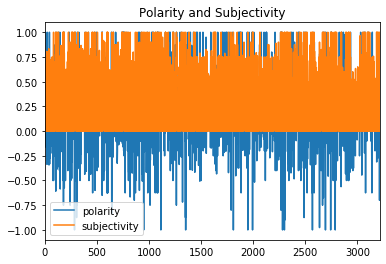

In [92]:
#lets look at the Sentiment of all the tweets 

polarity =[]
subj = []

for t in df.full_text :
    tx=TextBlob(t)
    polarity.append(tx.sentiment.polarity)
    subj.append(tx.sentiment.subjectivity)

#Store the polarity and subjectivity values in a data frame
polsubj = pd.DataFrame({'polarity' : polarity , 'subjectivity' :subj})

#plot polsubj
polsubj.plot(title="Polarity and Subjectivity")


In [93]:
##### PLOTING THE WORD CLOUD #########
import pip
#!pip install wordcloud
import nltk
#nltk.download('stopwords')

from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#One of the major forms of pre-processing is to filter out useless data. 
#In natural language processing, useless words (data), are referred to as stop words.
stop=stopwords.words('english')
#print("All the words processed out in english\n")
#print(stop)



In [99]:
new['Full Text']=df.full_text
new.where(new['Full Text']==np.max(new['Full Text'])).dropna().tolist()

['“You see it in enthusiasm for the President outside Walter Reed Hospital. You see it in Registrations, from Florida to Pennsylvania &amp; West Virginia, where Republicans are outstripping Democrats by 2 to 1. If the President bounces back onto the campaign trail, he will be an....']

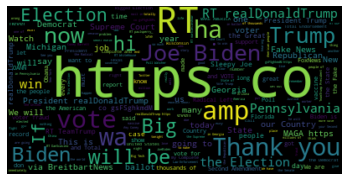

In [101]:
#generate wordcloud
wordcloud = WordCloud().generate(' '.join(new['Full Text']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the image in the img folder:
wordcloud.to_file("./WordCloud1.png")

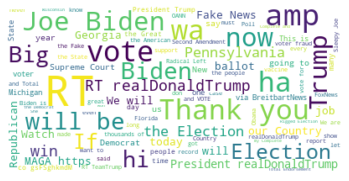

In [102]:
from wordcloud import STOPWORDS
# lower max_font_size, change the maximum number of word and lighten the background:
#ALSO add STOPWORDS
stop_words = ["https", "co", "RT","http"] + list(STOPWORDS)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",stopwords = stop_words).generate(' '.join(new['Full Text']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
# Save the image in the img folder:
wordcloud.to_file("./WordCloud2.png")